# Summary

In this notebook, we will perform Exploratory Data Analysis (EDA) in Python. Steps:
1. Preliminary
2. Data cleaning / Feature Engineering / Data Manipulation
3. Reading and Extracting Data

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [2]:
# adjust the path accordingly
df = pd.read_csv('admission_data.csv')
data = df.copy()

# df -> for feature engineering before machine learning
# data -> for EDA process
# data di-copy dari df supaya dalam proses EDA hanya dilakukan pada data tidak dengan df

#  Preliminary

## Sample of data

In [3]:
# Showing top 5 rows of the data
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


In [4]:
data.tail()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1


In [5]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
486,319.0,102.0,3.0,2.5,2.5,8.37,no,0
309,308.0,110.0,4.0,3.5,3.0,8.60,no,0
444,324.0,113.0,5.0,4.0,5.0,9.25,yes,1
451,324.0,113.0,4.0,4.5,4.5,9.25,yes,1
90,318.0,106.0,2.0,4.0,4.0,7.92,yes,0


Observations:
1. All columns, except `research_exp` column, are numeric
2. `research_exp` column seems to contain two distinct values (yes OR no), but will confirm later
3. `admit_status` is apparently also binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


Observation:
1. Data contains 8 columns with 505 rows
2. Most of the columns have missing values (except `research_exp` and `admit_status`), they will be handled later
3. All dtypes seem OK (appropriate), given the corresponding column name

# Statistical Summary

In [7]:
data.columns

Index(['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength',
       'recommendation_strength', 'gpa', 'research_exp', 'admit_status'],
      dtype='object')

In [8]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking',
              'motiv_letter_strength','recommendation_strength',
              'gpa','admit_status']

In [9]:
# Syntax numerical statistical summary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,496.000000,497.000000,498.000000,503.000000,499.000000,501.000000,505.000000
mean,316.491935,107.173038,3.130522,3.382704,3.484970,8.574571,0.574257
std,11.218848,6.024667,1.135238,0.985532,0.925582,0.600892,0.494945
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `gre_score`, `toefl_score`, and `gpa` column, indicating somewhat a symmetrical distribution
* `admit_status` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. Only need to check balance level
* `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength` are discrete values with not that many unique values, need to check values distribution later.


In [10]:
# Syntax describe method on categorical data
data[categoricals].describe()

,research_exp
count,505
unique,2
top,yes
freq,280


Observations:
* `research_exp` have 2 unique value, 'yes', and 'no'
* student most have research_exp (280 rows), and the rest have no research experience.

In [11]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of research_exp column
research_exp
yes    280
no     225
Name: count, dtype: int64 



In [12]:
for col in data.columns:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== gre_score ====
gre_score
312.0    24
324.0    23
316.0    18
322.0    17
321.0    17
325.0    16
327.0    16
311.0    16
314.0    16
320.0    15
317.0    15
315.0    13
323.0    13
313.0    13
308.0    13
326.0    12
319.0    12
318.0    12
300.0    12
301.0    11
304.0    11
305.0    11
310.0    11
328.0    10
299.0    10
298.0    10
329.0    10
331.0     9
340.0     9
307.0     9
309.0     9
334.0     8
330.0     8
306.0     7
332.0     7
302.0     7
297.0     6
296.0     5
295.0     5
336.0     5
303.0     5
333.0     4
335.0     4
339.0     3
338.0     3
337.0     2
290.0     2
293.0     1
294.0     1
Name: count, dtype: int64 

==== toefl_score ====
toefl_score
110.0    43
105.0    37
106.0    30
104.0    29
107.0    28
112.0    28
102.0    25
103.0    25
100.0    23
99.0     23
109.0    20
101.0    20
108.0    20
111.0    20
113.0    18
114.0    17
116.0    15
118.0    10
119.0    10
115.0    10
98.0      9
120.0     9
117.0     8
97.0      7
96.0      5
95.0      3
93.0    

# Feature Engineering / Data Cleaning / Data Manipulation

## 1. Duplicate Handling

In [13]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.9900990099009901

In [14]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = data[data.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
10,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
311,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1


Pada kode (df[df.duplicated(keep=False)]), Anda langsung mencetak baris yang memiliki duplikat dengan menggunakan metode duplicated dan memasukkan parameter keep=False. Ini mencetak semua baris yang memiliki duplikat tanpa mengurangi apa pun dari DataFrame.

In [15]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [16]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

#### Telah dihandling drop duplikat

# 2. Missing value handling
### Identifying Missing value

In [17]:
data.isna().sum()

,0
gre_score,9
toefl_score,8
univ_ranking,7
motiv_letter_strength,2
recommendation_strength,6
gpa,4
research_exp,0
admit_status,0


In [18]:
data.isnull().sum()

,0
gre_score,9
toefl_score,8
univ_ranking,7
motiv_letter_strength,2
recommendation_strength,6
gpa,4
research_exp,0
admit_status,0


In [19]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= gre_score =================


,count
gre_score,
312.0,24
324.0,23
316.0,18
322.0,17
321.0,16
327.0,16
311.0,16
314.0,15
320.0,15



============= toefl_score =================


,count
toefl_score,
110.0,43
105.0,37
104.0,29
107.0,28
106.0,28
112.0,28
103.0,25
102.0,24
100.0,23



============= univ_ranking =================


,count
univ_ranking,
3.0,161
2.0,123
4.0,104
5.0,73
1.0,32



============= motiv_letter_strength =================


,count
motiv_letter_strength,
4.0,89
3.5,88
3.0,80
4.5,63
2.5,63
2.0,43
5.0,42
1.5,24
1.0,6



============= recommendation_strength =================


,count
recommendation_strength,
3.0,98
4.0,92
3.5,85
4.5,62
2.5,50
5.0,49
2.0,46
1.5,11
1.0,1



============= gpa =================


,count
gpa,
8.00,9
8.76,9
8.45,7
8.56,7
8.54,7
8.50,6
8.34,6
8.64,6
9.02,6



============= research_exp =================


,count
research_exp,
yes,276
no,224



============= admit_status =================


,count
admit_status,
1,287
0,213


- The GRE has a score range of 260–340 for the total score
- toefl score 0-120

In [20]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'gre_score' Has 9 missing values (1.80%)
Column 'toefl_score' Has 8 missing values (1.60%)
Column 'univ_ranking' Has 7 missing values (1.40%)
Column 'motiv_letter_strength' Has 2 missing values (0.40%)
Column 'recommendation_strength' Has 6 missing values (1.20%)
Column 'gpa' Has 4 missing values (0.80%)
Column 'research_exp' Has 0 missing values (0.00%)
Column 'admit_status' Has 0 missing values (0.00%)


The percentage of missing values below 20% so we handle numerically with median, categorical with mode. But the categorical data type does not have missing values, namely research_exp.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                491 non-null    float64
 1   toefl_score              492 non-null    float64
 2   univ_ranking             493 non-null    float64
 3   motiv_letter_strength    498 non-null    float64
 4   recommendation_strength  494 non-null    float64
 5   gpa                      496 non-null    float64
 6   research_exp             500 non-null    object 
 7   admit_status             500 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 35.2+ KB


In [22]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-22-899fd06491ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-22-899fd06491ef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [23]:
data.isna().sum()

,0
gre_score,0
toefl_score,0
univ_ranking,0
motiv_letter_strength,0
recommendation_strength,0
gpa,0
research_exp,0
admit_status,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                500 non-null    float64
 1   toefl_score              500 non-null    float64
 2   univ_ranking             500 non-null    float64
 3   motiv_letter_strength    500 non-null    float64
 4   recommendation_strength  500 non-null    float64
 5   gpa                      500 non-null    float64
 6   research_exp             500 non-null    object 
 7   admit_status             500 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 35.2+ KB


Success removing NULL values!

## 3. Outlier Handling

In [25]:
import scipy.stats as stats

def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [26]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength',
       'recommendation_strength', 'gpa', 'admit_status'],
      dtype='object')

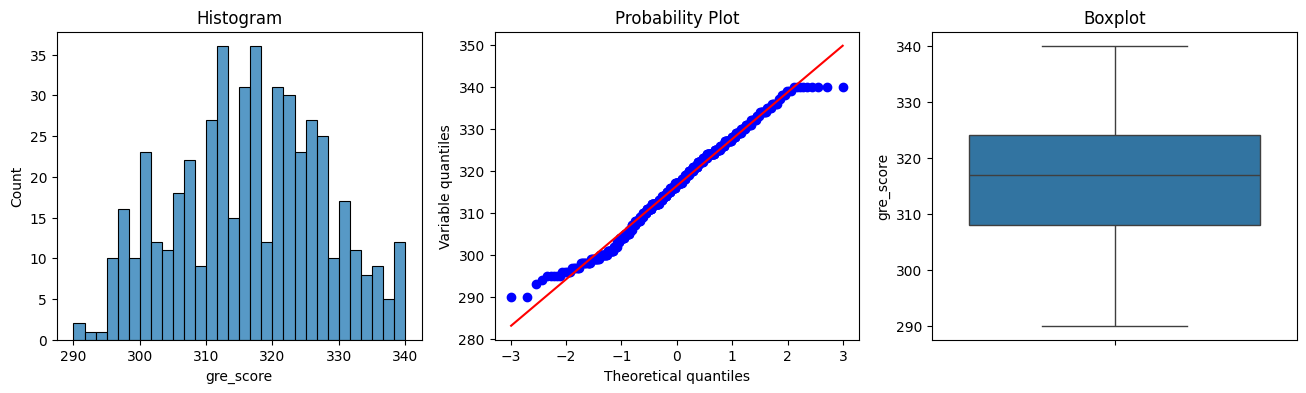

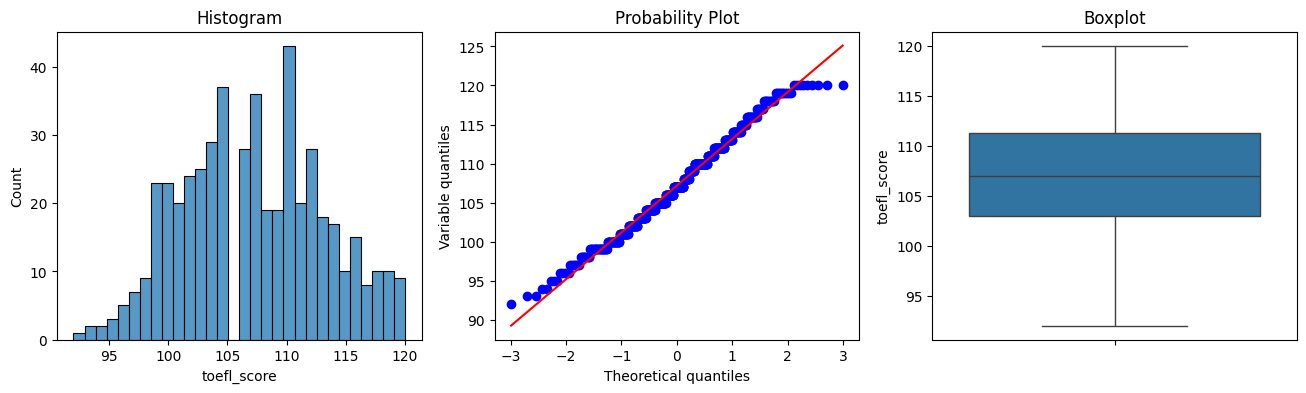

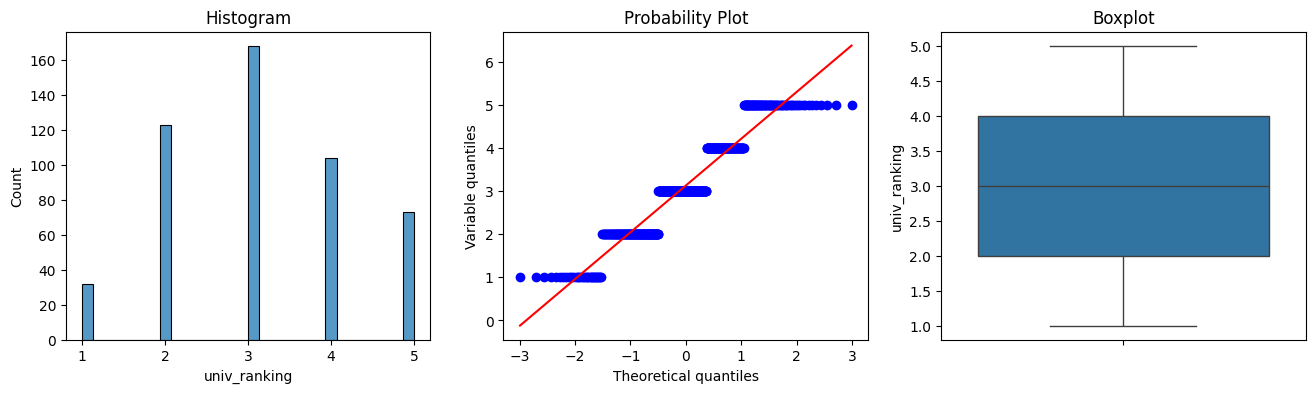

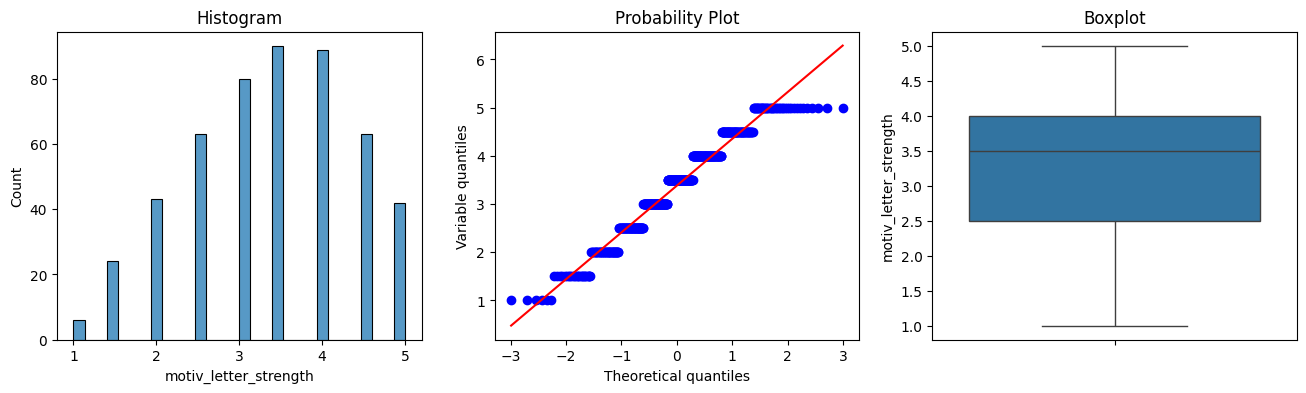

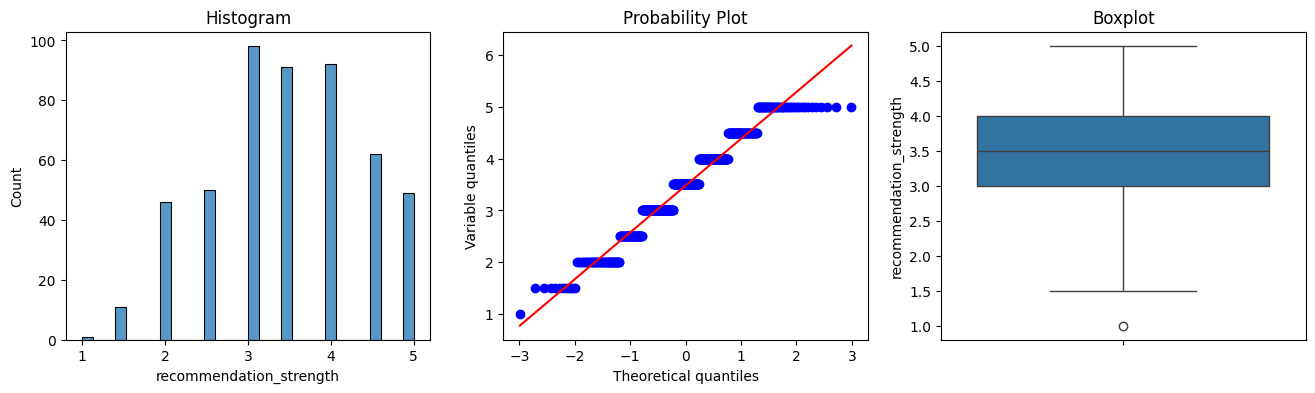

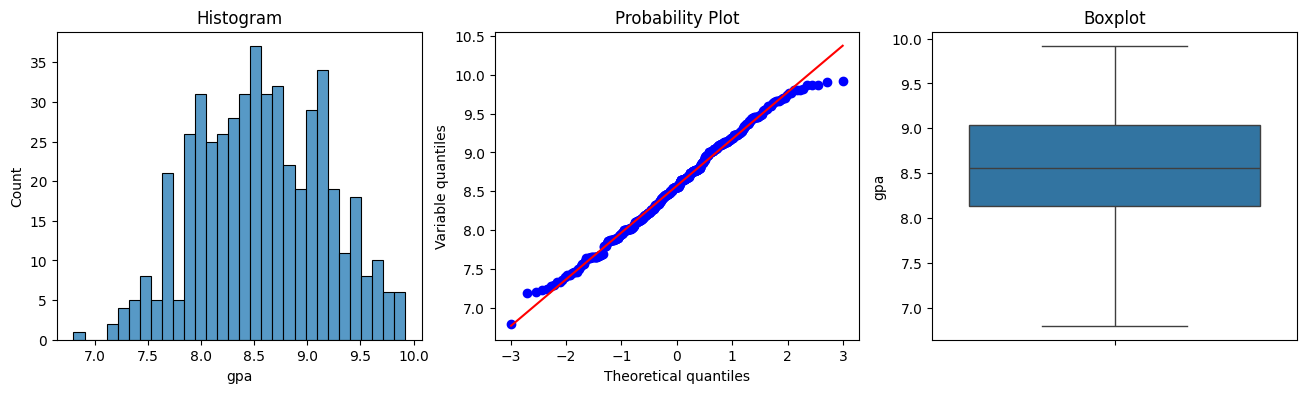

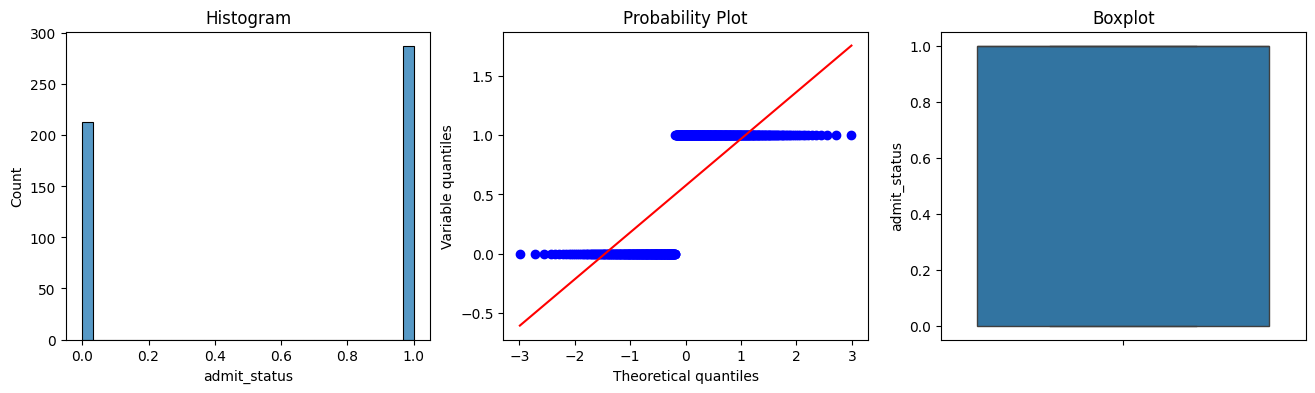

In [27]:
# Memvisualisasikan outlier hanya pada kolom numerik
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(data, col)

In [28]:
# check the outlier full profile
outlier = data['recommendation_strength'].min()

data[data['recommendation_strength'] == outlier]

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
347,299.0,94.0,1.0,1.0,1.0,7.34,no,0


Obervation:
1. There is one outlier in the `recommendation_strength` column (value = 1)
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

## Reasoning not doing encoding and feature scalling
After we look at and investigate each column, there are 2 things we can get:
- The only categorical column in `research_exp` contains yes and no, so we just leave it in yes and no instead of changing it to 1 and 0 in the encoder label, this doesn't matter `as long as it is easy to read`. Returned to the respective users.
- Numerical columns `all have reasonable values` within the range of values in each column and have clear definition limits in each column so that we don't need to do feature scaling.

# Univariate Analysis
### Boxplot to check outlier, same as above

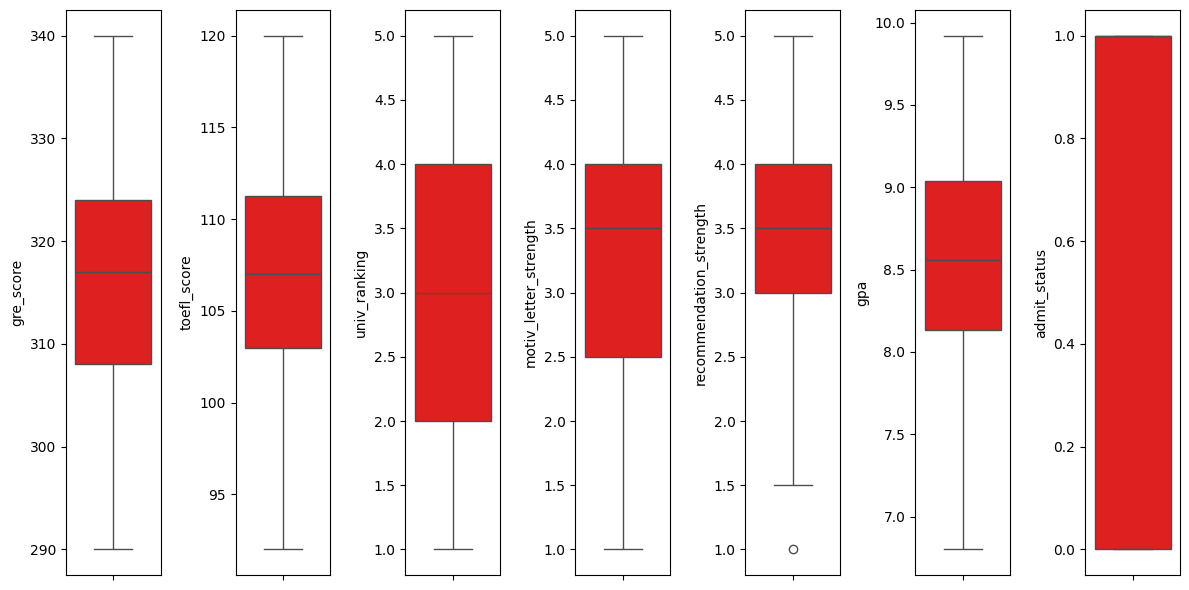

In [29]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [30]:
# check the outlier full profile
outlier = data['recommendation_strength'].min()

data[data['recommendation_strength'] == outlier]

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
347,299.0,94.0,1.0,1.0,1.0,7.34,no,0


Obervation:
1. There is one outlier in the `recommendation_strength` column (value = 1)
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

## KDE plot for knowing the distribution form

In [31]:
columns = data.columns
for i in columns:
    print(i)

gre_score
toefl_score
univ_ranking
motiv_letter_strength
recommendation_strength
gpa
research_exp
admit_status


In [32]:
range(0, len(features))

range(0, 7)

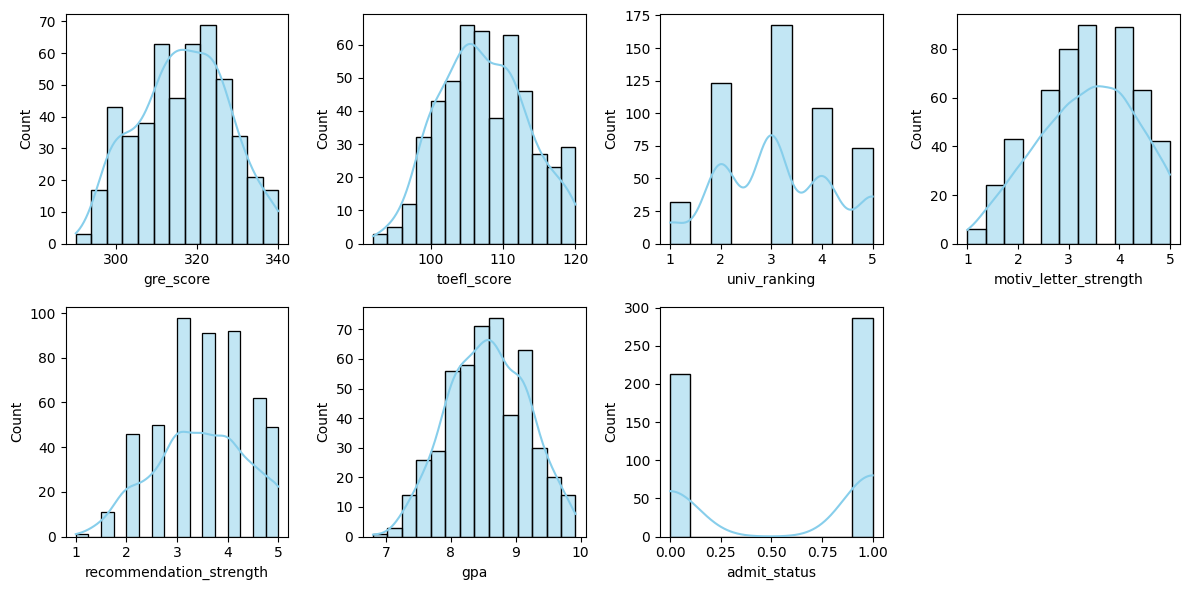

In [33]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=data[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. Continuous numeric features: `gre_score`, `toefl_score`, and `gpa` are somewhat symmetric, typical/most frequent values are 320 (`gre_score`), 105 (`toefl_score`), and 8.5 (`gpa`)
2. Meanwhile for columns with discrete values such as `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength`, most students have 3 in `univ_ranking`, 3.5 in `motiv_letter`, and 3 in `recommendation_strength`
3. In terms of the target variable, `admit_status = 1` is more frequent in the dataset, but it's not that extreme.

<Axes: xlabel='research_exp', ylabel='count'>

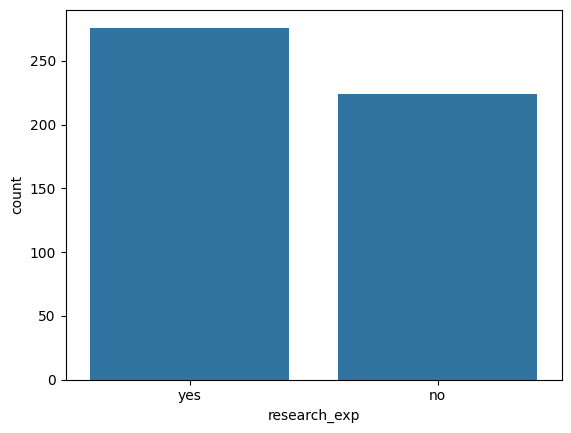

In [34]:
# count plot for research_exp column
sns.countplot(data=data, x="research_exp")

# Multivariate Analysis

In [35]:
# remember the dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


<Axes: xlabel='research_exp', ylabel='count'>

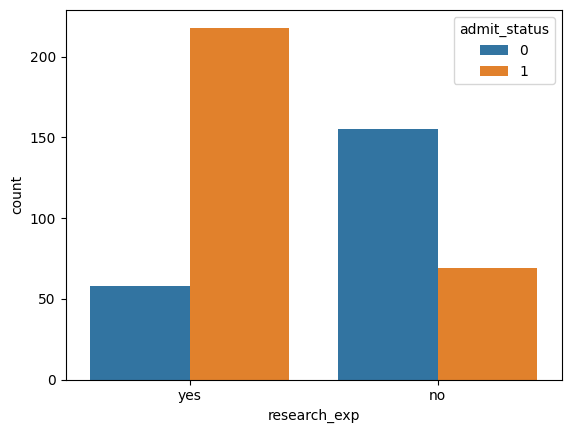

In [36]:
# research_exp affect admit_status?
sns.countplot(data=data,
            x='research_exp',
            hue='admit_status'
            )

1. Let's say admit_status = 1, means admitted, and admit_status = 0, means otherwise
2. We can say that, applicants with research experience is more likely to be admitted.

<Axes: >

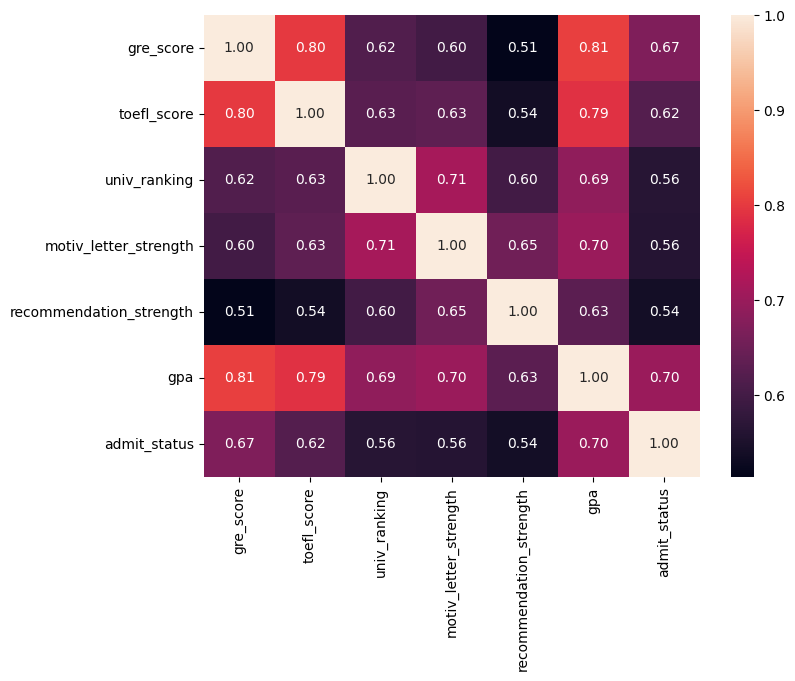

In [37]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = data[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. `toefl_score`, `gre_score`, and `gpa` are highly correlated each other
2. Hint: choose only one of them for modelling feature because they are redundant (will be discussed in Linear Regression class)

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible (no need to drop)
5. From barcharts of `admit_status` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
6. From correlation heatmap: We can see that `gre_score` is correlated with `gpa` and `toefl_score`. We can choose either of them for modelling.